In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from astropy.cosmology import FlatLambdaCDM
from hmf import MassFunction
import pyccl as ccl

from kids_ggl_pipeline.halomodel import dark_matter as dm

In [3]:
z = np.linspace(0, 1, 5)

In [54]:
delta = 200
ref_density = 'critical'

In [55]:
H0 = 67.7
Omega_m = 0.307
Omega_b = 0.0224/(H0/100)**2
Omega_c = Omega_m - Omega_b
ns = 0.965
sigma8 = 0.81
As = 2.1e-9
Tcmb = 2.725

In [56]:
cosmo = FlatLambdaCDM(H0=H0, Om0=Omega_m, Ob0=Omega_b, Tcmb0=Tcmb)

In [57]:
cclcosmo = ccl.Cosmology(Omega_c=Omega_c, Omega_b=Omega_b, h=H0/100, A_s=As, n_s=ns)
dens = ref_density if ref_density == 'critical' else 'matter'
mdef = ccl.halos.MassDef(delta, dens)

In [58]:
%%time
bias = ccl.halos.HaloBiasTinker10(cclcosmo, mass_def=mdef)

CPU times: user 3.7 s, sys: 10.9 ms, total: 3.71 s
Wall time: 614 ms


In [59]:
%%time
bh = np.array([bias.get_halo_bias(cclcosmo, 1e14, 1/(1+zi)) for zi in z])
bh

CPU times: user 320 µs, sys: 0 ns, total: 320 µs
Wall time: 334 µs


array([1.98202169, 2.36710491, 2.89152299, 3.56023727, 4.37805814])

Now with ``kids_ggl``

In [60]:
mdef_model = f'SO{ref_density.capitalize()}'
hmf = [MassFunction(Mmin=14, Mmax=15, dlog10m=2, hmf_model='Tinker10', mdef_model=mdef_model,
                    mdef_params={'overdensity': delta}, delta_c=1.686, #disable_mass_conversion=True,
                    cosmo_model=cosmo, z=zi)
       for zi in z]

In [61]:
%%time
bh_kids = np.array([dm.bias_tinker10(hmf_i) for hmf_i in hmf])[:,0]
bh_kids

CPU times: user 5min 49s, sys: 187 ms, total: 5min 50s
Wall time: 1min 9s


array([3.32742708, 3.89908784, 4.85848416, 6.20660233, 7.94203986])

[Text(0, 0.5, 'KiDS halo bias / CCL halo bias'), Text(0.5, 0, 'z')]

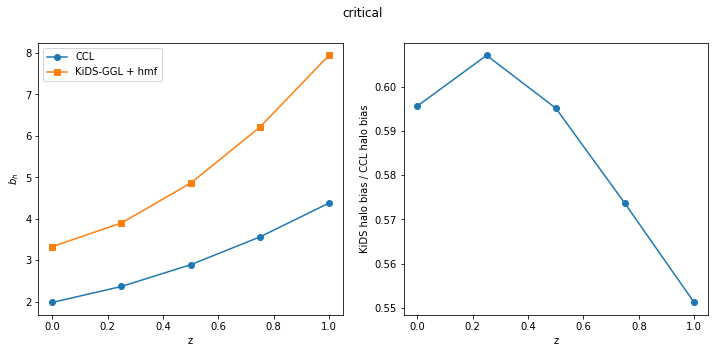

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle(ref_density)
axes[0].plot(z, bh, 'o-', label='CCL')
axes[0].plot(z, bh_kids, 's-', label='KiDS-GGL + hmf')
axes[0].set(xlabel='z', ylabel='$b_h$')
axes[0].legend()
axes[1].plot(z, bh_kids/bh, 'o-')
axes[1].set(xlabel='z', ylabel='KiDS halo bias / CCL halo bias')

[Text(0, 0.5, 'KiDS halo bias / CCL halo bias'), Text(0.5, 0, 'z')]

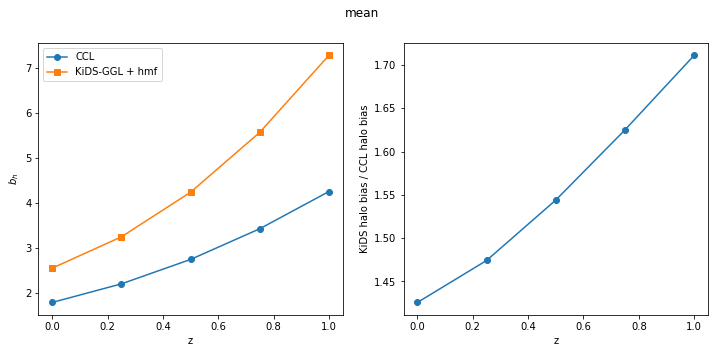

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle(ref_density)
axes[0].plot(z, bh, 'o-', label='CCL')
axes[0].plot(z, bh_kids, 's-', label='KiDS-GGL + hmf')
axes[0].set(xlabel='z', ylabel='$b_h$')
axes[0].legend()
axes[1].plot(z, bh_kids/bh, 'o-')
axes[1].set(xlabel='z', ylabel='KiDS halo bias / CCL halo bias')